**Import all the Libraries and data**

In [268]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
%matplotlib inline

In [269]:
titanic_train = pd.read_csv('https://raw.githubusercontent.com/Deepak1998Mittal/titanic/master/train.csv')
titanic_test = pd.read_csv('https://raw.githubusercontent.com/Deepak1998Mittal/titanic/master/test.csv')
P_ID = titanic_test['PassengerId']

In [270]:
titanic_train.shape

(891, 12)

In [271]:
titanic_test.shape

(418, 11)

In [272]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [273]:
titanic_test.head(2)                                  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [274]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [275]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [276]:
2+np.nan

nan

* The features having NaN value gives mean,std,etc all NaN 

In [277]:
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Larsson, Mr. August Viktor",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [278]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [279]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **-----------------------------------------------------------------------------------------------------------**

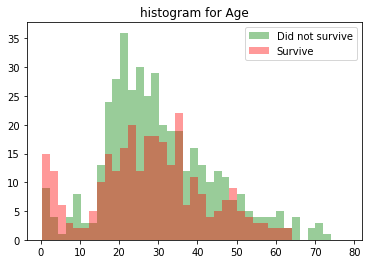

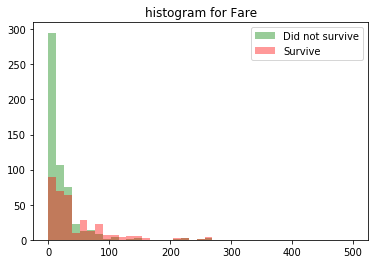

In [280]:
for i in ["Age","Fare"]:
    died= list(titanic_train[titanic_train["Survived"]==0][i].dropna())
    survived = list(titanic_train[titanic_train["Survived"]==1][i].dropna())
    xmin= min(min(died),min(survived))
    xmax=max(max(died),max(survived))
    width=(xmax-xmin)/40
    sns.distplot(died,color='g',kde=False,bins=np.arange(xmin,xmax,width))
    sns.distplot(survived,color='r',kde=False,bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survive','Survive'])        
    plt.title("histogram for {}".format(i)) 
    plt.show()

In [281]:
complete_dataset = [titanic_train, titanic_test]
for i in complete_dataset:
    i['Title']=i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(titanic_train['Title'], titanic_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


# **-----------------------------------------------------------------------------------------------------------**

## Heatmap to determine the relation between features

*For more info:* https://seaborn.pydata.org/generated/seaborn.heatmap.html

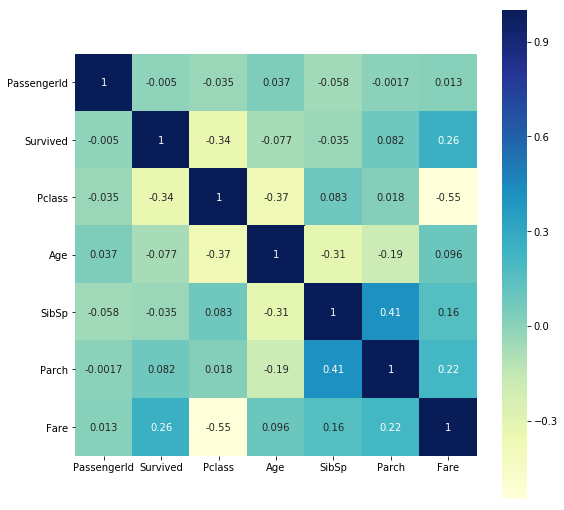

In [282]:
corr = titanic_train.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')     # annot=True is use to write the corr value on the sq. box

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F22899DA0>,
      dtype=object)

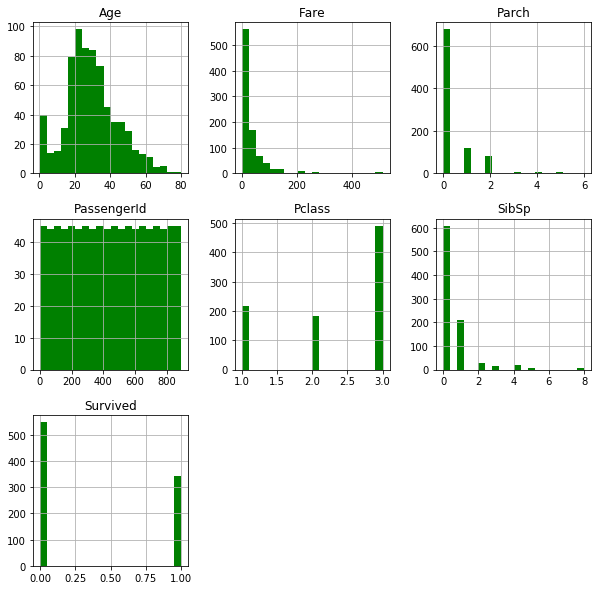

In [283]:
titanic_train.hist(bins=20,figsize=(10,10),grid=True,color='g')

**For more information related to seaborn.FacetGrid :** https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

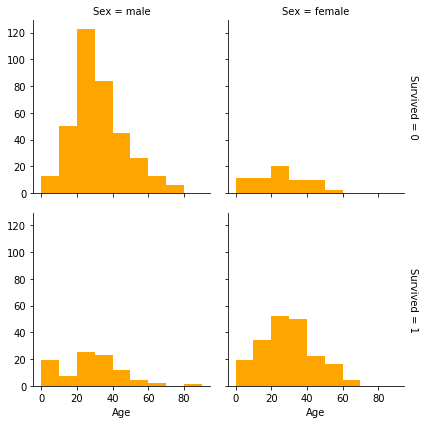

In [284]:
bins=np.arange(0,100,10)
g = sns.FacetGrid(titanic_train, col="Sex", row="Survived", margin_titles=True)   #Also,try with removing margin_titles=True
g.map(plt.hist, "Age",color="orange",bins=bins)

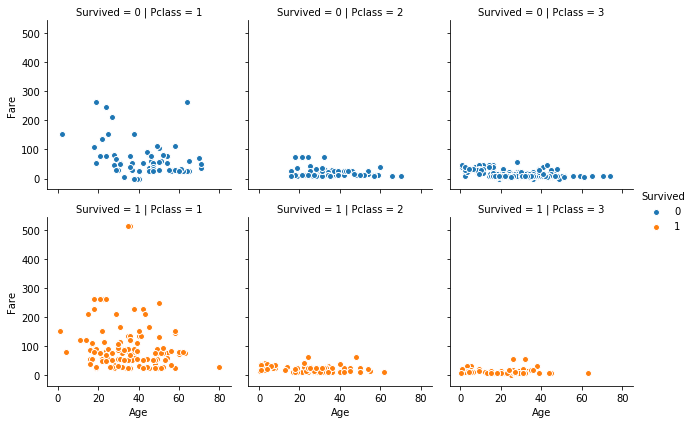

In [285]:
g=sns.FacetGrid(titanic_train,hue="Survived",row='Survived', col="Pclass")
g=g.map(plt.scatter,'Age','Fare',edgecolor='w').add_legend()

*To combine both the rows,remove the* **rows='Survived'**

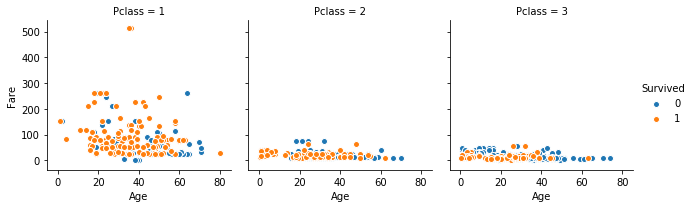

In [286]:
g=sns.FacetGrid(titanic_train,hue="Survived", col="Pclass")
g=g.map(plt.scatter,'Age','Fare',edgecolor='w').add_legend()

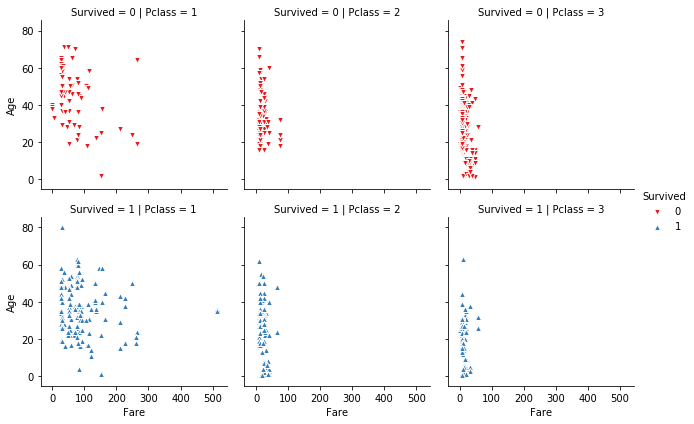

In [287]:
g=sns.FacetGrid(titanic_train,hue="Survived",row='Survived', col="Pclass",palette="Set1",hue_kws=dict(marker=["v","^"]))
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

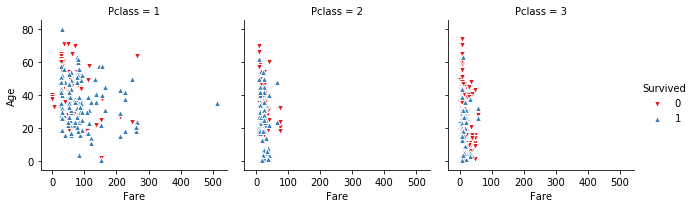

In [288]:
g=sns.FacetGrid(titanic_train,hue="Survived", col="Pclass",palette="Set1",hue_kws=dict(marker=["v","^"]))
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

* for more info: https://seaborn.pydata.org/generated/seaborn.catplot.html

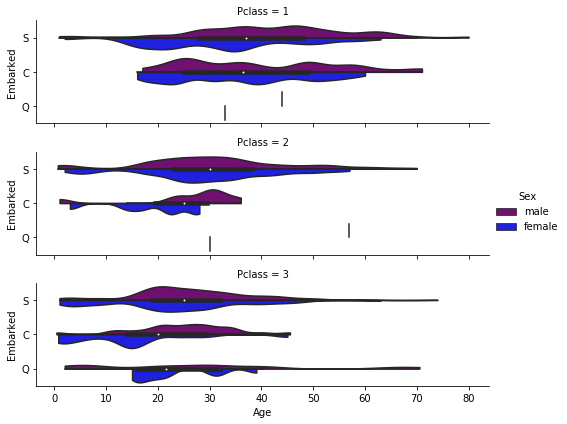

In [289]:
g = sns.catplot(x="Age", y="Embarked",hue="Sex", row="Pclass",data=titanic_train[titanic_train.Embarked.notnull()],orient="h",
                   height=2, aspect=3.5, palette={'male':"purple", 'female':"blue"},kind="violin", split=True, cut=0, bw=.2)

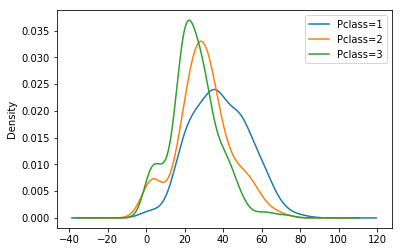

In [290]:
titanic_train['Age'][titanic_train['Pclass']==1].plot(kind='kde')
titanic_train['Age'][titanic_train['Pclass']==2].plot(kind='kde')
titanic_train['Age'][titanic_train['Pclass']==3].plot(kind='kde')
plt.legend(['Pclass=1','Pclass=2','Pclass=3'])

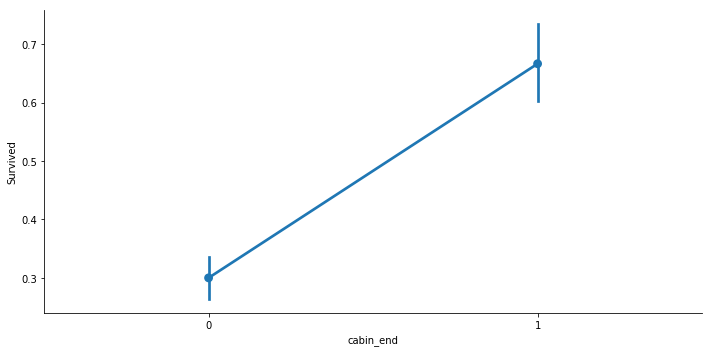

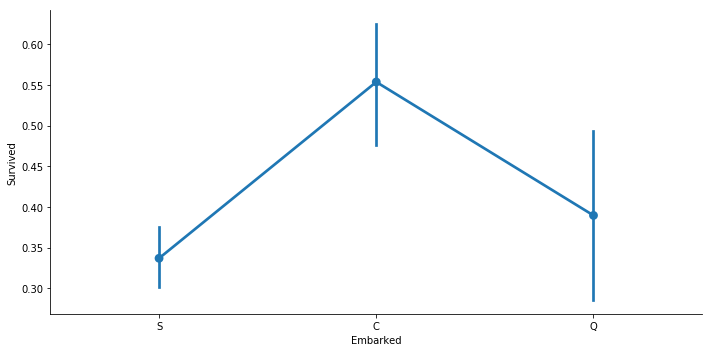

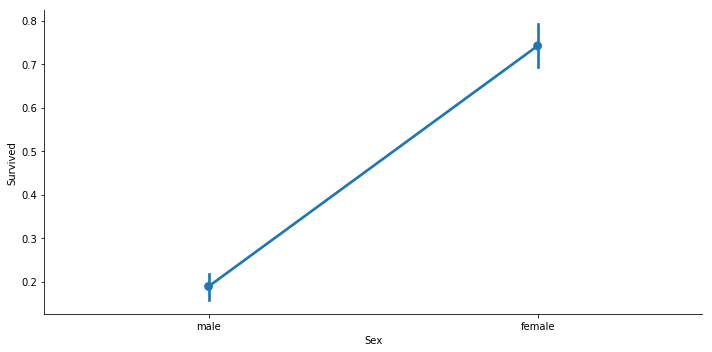

In [291]:
titanic_train['cabin_end'] = np.where(titanic_train['Cabin'].isnull(),0,1)
titanic_test['cabin_end'] = np.where(titanic_test['Cabin'].isnull(),0,1)
for col in ['cabin_end','Embarked','Sex']:
    sns.catplot(x=col,y='Survived',data = titanic_train,kind='point',aspect=2)

* It is observed that people having assigned cabin are more likely to survive  
* It is observed that more females had survived than males
* It is possible that S board could have more males or less cabin assinged people than C board  
* The hypothesis that C board people survived more than S board can be solved by going through different parameter    
* **pivot_table** can be helpful to solve this problem

In [292]:
titanic_train[['Survived','cabin_end']].groupby(titanic_train['Cabin'].isnull()).mean()

,Survived,cabin_end
Cabin,,
False,0.666667,1
True,0.299854,0


* over 66% people survived with non-missing cabin while over 29% survived with missing cabins

In [293]:
titanic_train.pivot_table('Survived',index='Sex',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [294]:
titanic_train.pivot_table('Survived',index='cabin_end',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
cabin_end,,,
0,99,73,515
1,69,4,129


It is observed that the people of C board is more likely to survived beacause-
* Their were more number of females and more assigned cabins than S board
* More females had survived and more people with assigned cabin had survived

In [295]:
titanic_train.pivot_table('Survived',index='Pclass',columns='Embarked',aggfunc='count')#few people of Pclass 1,2 are for Q board

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


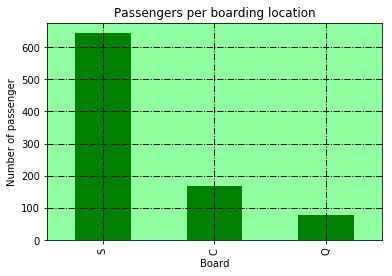

In [296]:
a=titanic_train['Embarked'].value_counts().plot(kind='bar',color='green')
plt.grid(color='black', linestyle='-.', linewidth=1)
plt.title("Passengers per boarding location")
plt.xlabel('Board')
plt.ylabel('Number of passenger')
a.set_facecolor('xkcd:mint green')

# **-----------------------------------------------------------------------------------------------------------**

### Missing value(s) imputation

In [297]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
cabin_end        0
dtype: int64

* Missing Cabins has been filled with 0 and non-missing with 1

In [298]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,cabin_end
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1


In [299]:
titanic_test[titanic_test['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,cabin_end


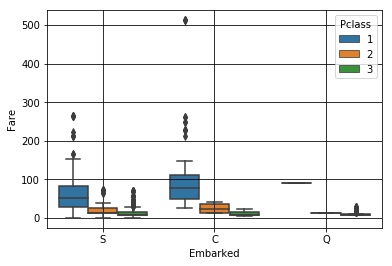

In [300]:
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=titanic_train)
plt.grid(color='black')

The following conclusion can be drawn:
* According to the missing Embarked, both are of Pclass = 1
* According to boxplot, the median fare of Pclass = 1 is around 80$ for board C
* The missing Embarked should be fill with the board C 

In [301]:
titanic_train['Embarked']=titanic_train['Embarked'].fillna('C')

In [302]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
cabin_end        0
dtype: int64

In [303]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
cabin_end        0
dtype: int64

In [304]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,cabin_end
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,0


In [305]:
fare = titanic_test[(titanic_test['Pclass']==3)&(titanic_test['Embarked']=='S')]['Fare'].median()

In [306]:
titanic_test['Fare']=titanic_test['Fare'].fillna(fare)

In [307]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
cabin_end        0
dtype: int64

# **-----------------------------------------------------------------------------------------------------------**

## Features
All the assigned cabin codes contains the floor code with first character

In [308]:
titanic_train['Cabin'][titanic_train['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [309]:
titanic_train['Cabin'][titanic_train['Cabin'].str[0]=='T']

339    T
Name: Cabin, dtype: object

In [310]:
titanic_train['Floor']=titanic_train['Cabin'].str[0]
titanic_test['Floor']=titanic_train['Cabin'].str[0]

In [311]:
titanic_train['Floor'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [312]:
titanic_test['Floor'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

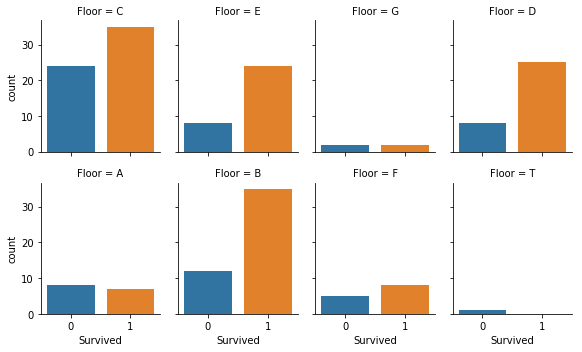

In [313]:
sns.catplot("Survived", col="Floor", col_wrap=4,
                    data=titanic_train[titanic_train.Floor.notnull()],
                    kind="count", height=2.5, aspect=.8)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


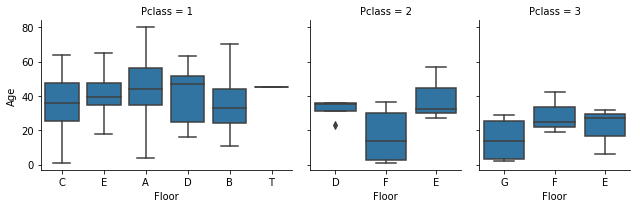

In [314]:
g = sns.FacetGrid(titanic_train, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Floor", "Age")

In [315]:
titanic_train['Floor'].fillna('Z',inplace=True)
titanic_test['Floor'].fillna('Z',inplace=True)
titanic_train['Floor'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Survival of people based upon the Sex: **Sex as a feature**

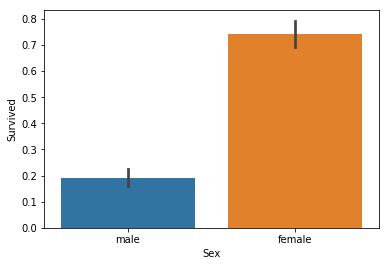

In [316]:
sns.barplot(x='Sex',y='Survived',data=titanic_train)

In [317]:
print('Male Survived   : ',titanic_train['Survived'][titanic_train['Sex']=='male'].value_counts(normalize=True)[1]*100,'%')
print('Female Survived : ',titanic_train['Survived'][titanic_train['Sex']=='female'].value_counts(normalize=True)[1]*100,'%')

Male Survived   :  18.890814558058924 %
Female Survived :  74.20382165605095 %


**Family as a feature**

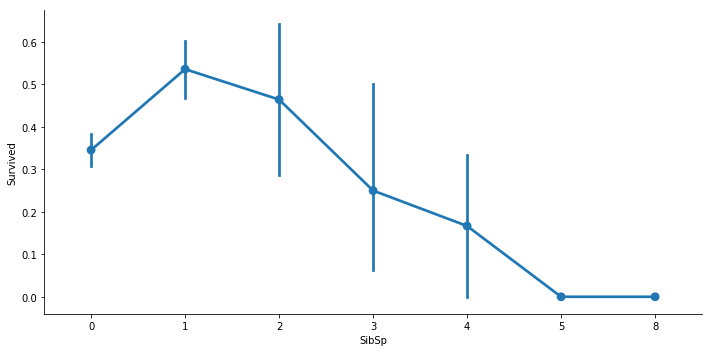

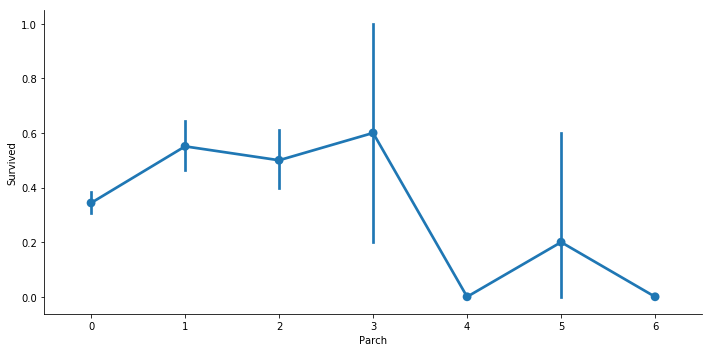

In [318]:
for col in ['SibSp','Parch']:
    sns.catplot(x=col,y='Survived',data=titanic_train,kind='point',aspect=2) #vertical line shows the error

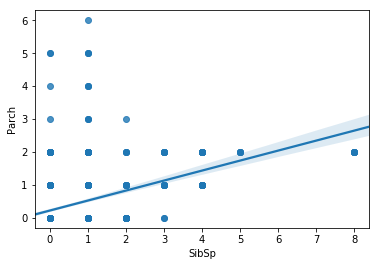

In [319]:
sns.regplot(x=titanic_train['SibSp'],y=titanic_train['Parch'])

* It is found that the people having large family(Parch) and more siblings(Sibsp) were less likely to survive.

In [320]:
from scipy import stats
pearson_coeff,p_value=stats.pearsonr(titanic_train['SibSp'],titanic_train['Parch'])
print(pearson_coeff,p_value)

0.4148376986201561 2.2418236681398336e-38


**Class as a feature**

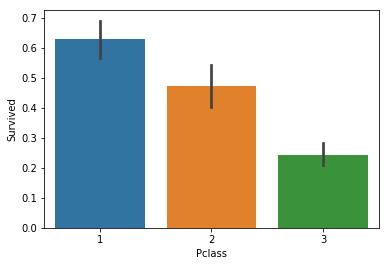

In [321]:
sns.barplot(x='Pclass',y='Survived',data=titanic_train)

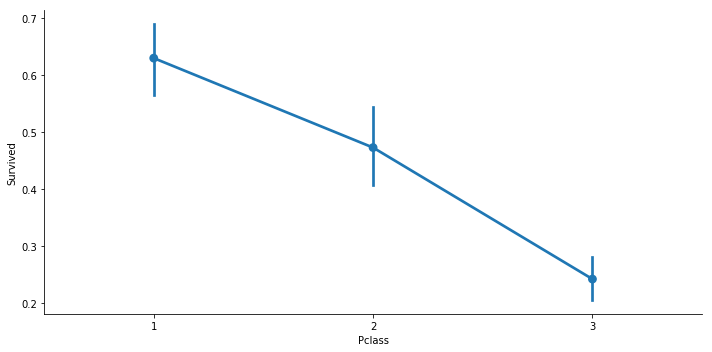

In [322]:
sns.catplot(x='Pclass',y='Survived',data=titanic_train,kind='point',aspect=2)

In [323]:
print('Pclass=1 Survived :',titanic_train['Survived'][titanic_train['Pclass']==1].value_counts(normalize=True)[1]*100,'%')
print('Pclass=2 Survived :',titanic_train['Survived'][titanic_train['Pclass']==2].value_counts(normalize=True)[1]*100,'%')
print('Pclass=3 Survived :',titanic_train['Survived'][titanic_train['Pclass']==3].value_counts(normalize=True)[1]*100,'%')

Pclass=1 Survived : 62.96296296296296 %
Pclass=2 Survived : 47.28260869565217 %
Pclass=3 Survived : 24.236252545824847 %


**Cabin as a feature**

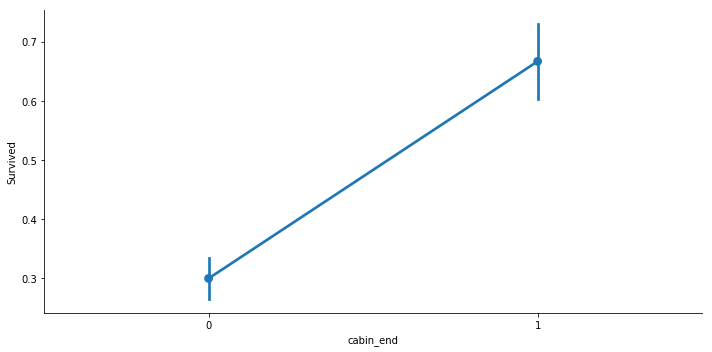

In [324]:
sns.catplot(x='cabin_end',y='Survived',data=titanic_train,kind='point',aspect=2)

In [325]:
print('Survived people with assigned cabin     :',
      titanic_train['Survived'][titanic_train['cabin_end']==1].value_counts(normalize=True)[1]*100,'%')
print('Survived people with non-assigned cabin :',
      titanic_train['Survived'][titanic_train['cabin_end']==0].value_counts(normalize=True)[1]*100,'%')

Survived people with assigned cabin     : 66.66666666666666 %
Survived people with non-assigned cabin : 29.985443959243085 %


In [326]:
print('Survived female without assigned cabin :',
      titanic_train['Survived'][(titanic_train['Sex']=='female')&(titanic_train['cabin_end']==0)]
      .value_counts(normalize=True)[1]*100,'%')

Survived female without assigned cabin : 65.43778801843318 %


In [327]:
print('Survived female without assigned cabin and Pclass=3 :',
      titanic_train['Survived'][(titanic_train['Sex']=='female')&(titanic_train['cabin_end']==0)&(titanic_train['Pclass']==3)]
      .value_counts(normalize=True)[1]*100,'%')

Survived female without assigned cabin and Pclass=3 : 49.275362318840585 %


In [328]:
print('Survived male without assigned cabin and Pclass=3 :',
      titanic_train['Survived'][(titanic_train['Sex']=='male')&(titanic_train['cabin_end']==0)&(titanic_train['Pclass']==3)]
      .value_counts(normalize=True)[1]*100,'%')

Survived male without assigned cabin and Pclass=3 : 13.196480938416421 %


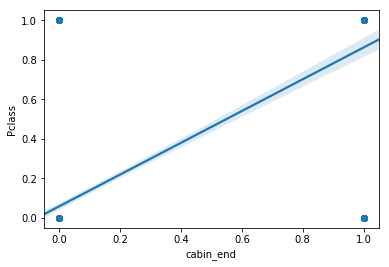

In [329]:
sns.regplot(titanic_train['cabin_end']==1,titanic_train['Pclass']==1)

In [330]:
pearson_coeff,p_value = stats.pearsonr(titanic_train['cabin_end']==1,titanic_train['Pclass']==1)
print(pearson_coeff,p_value)

0.7887730068967491 4.385671944937056e-190


**Embarked as a feature**

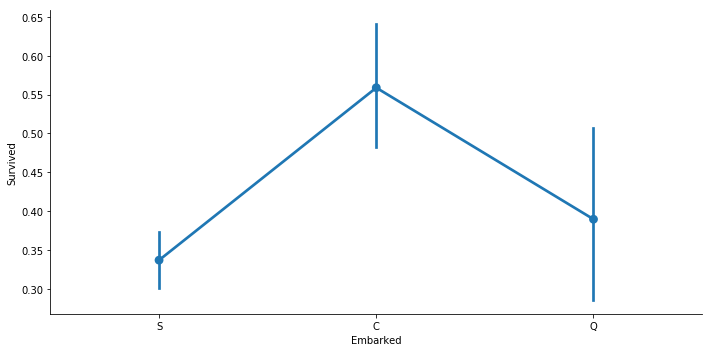

In [331]:
sns.catplot(x='Embarked',y='Survived',data=titanic_train,kind='point',aspect=2)

In [332]:
print('Survived people with Embarked S :',
      titanic_train['Survived'][titanic_train['Embarked']=='S'].value_counts(normalize=True)[1]*100,'%')
print('Survived people with Embarked C :',
      titanic_train['Survived'][titanic_train['Embarked']=='C'].value_counts(normalize=True)[1]*100,'%')
print('Survived people with Embarked Q :',
      titanic_train['Survived'][titanic_train['Embarked']=='Q'].value_counts(normalize=True)[1]*100,'%')

Survived people with Embarked S : 33.69565217391305 %
Survived people with Embarked C : 55.88235294117647 %
Survived people with Embarked Q : 38.961038961038966 %


In [333]:
print('Survived people with Embarked C and Pclass=1 :',
      titanic_train['Survived'][(titanic_train['Embarked']=='C')&(titanic_train['Pclass']==1)]
      .value_counts(normalize=True)[1]*100,'%')

Survived people with Embarked C and Pclass=1 : 70.11494252873564 %


# **-----------------------------------------------------------------------------------------------------------**

# Cleaning remaining data for model evaluation

In [334]:
titanic_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,cabin_end,Floor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Z
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,0,Z
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,E


* Sex

In [335]:
titanic_train['Sex']=np.where(titanic_train['Sex']=='male',0,1) 
titanic_test['Sex']=np.where(titanic_test['Sex']=='male',0,1)

* Embarked

In [336]:
Embarked_map = {"S": 1, "C": 2, "Q": 3}
titanic_train['Embarked'] = titanic_train['Embarked'].map(Embarked_map)
titanic_test['Embarked'] = titanic_test['Embarked'].map(Embarked_map)

* Drop extra features

In [337]:
drop_things=['PassengerId','Name','Ticket','Cabin']
titanic_train.drop(drop_things,axis=1,inplace=True)
titanic_test.drop(drop_things,axis=1,inplace=True)

In [338]:
titanic_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
cabin_end     0
Floor         0
dtype: int64

* Categorial features into numeric feature : Floor

In [339]:
from sklearn.preprocessing import LabelEncoder
labelEnc=LabelEncoder()
titanic_train['Floor']=labelEnc.fit_transform(titanic_train['Floor'])
titanic_test['Floor']=labelEnc.fit_transform(titanic_test['Floor'])

* Title

In [340]:
titanic_train['Title'] = titanic_train['Title'].replace(['Col','Don', 'Lady','Rev',
                                                         'Jonkheer', 'Capt', 'Dr','Countess','Sir', 'Major',  'Dona'], 'Few')
titanic_train['Title'] = titanic_train['Title'].replace(['Mlle','Ms'], 'Miss')
titanic_train['Title'] = titanic_train['Title'].replace('Mme', 'Mrs')
titanic_test['Title']  = titanic_test['Title'].replace(['Col','Don', 'Lady','Rev',
                                                         'Jonkheer', 'Capt', 'Dr','Countess','Sir', 'Major',  'Dona'], 'Few')
titanic_test['Title']  = titanic_test['Title'].replace(['Mlle','Ms'], 'Miss')
titanic_test['Title']  = titanic_test['Title'].replace('Mme', 'Mrs')

In [341]:
titanic_train['Title'] = labelEnc.fit_transform(titanic_train['Title'])
titanic_test['Title']  = labelEnc.fit_transform(titanic_test['Title'])

In [342]:
titanic_train['Title'].value_counts()

3    517
2    185
4    126
1     40
0     23
Name: Title, dtype: int64

In [343]:
titanic_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,cabin_end,Floor
0,0,3,0,22.0,1,0,7.2500,1,3,0,8
1,1,1,1,38.0,1,0,71.2833,2,4,1,2
2,1,3,1,26.0,0,0,7.9250,1,2,0,8
3,1,1,1,35.0,1,0,53.1000,1,4,1,2
4,0,3,0,35.0,0,0,8.0500,1,3,0,8
5,0,3,0,NaN,0,0,8.4583,3,3,0,8
6,0,1,0,54.0,0,0,51.8625,1,3,1,4
7,0,3,0,2.0,3,1,21.0750,1,1,0,8
8,1,3,1,27.0,0,2,11.1333,1,4,0,8
9,1,2,1,14.0,1,0,30.0708,2,4,0,8


In [344]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,cabin_end,Floor
0,3,0,34.5,0,0,7.8292,3,3,0,8
1,3,1,47.0,1,0,7.0000,1,4,0,2
2,2,0,62.0,0,0,9.6875,3,3,0,8
3,3,0,27.0,0,0,8.6625,1,3,0,2
4,3,1,22.0,1,1,12.2875,1,4,0,8


* Only Age feature is remaining left with discontinous values
* Filling missing Age with average value is not a good practice always
* for more info about RFR : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [345]:
from sklearn.ensemble import RandomForestRegressor
for dataset in [titanic_train,titanic_test]:
    train_missing_age_df = dataset.loc[(dataset['Age'].notnull())]
    test_missing_age_df  = dataset.loc[(dataset['Age'].isnull())]
    cols = ['Age']  + [col for col in dataset.columns if col != 'Age'] #Transferring Age from index 3 to index 0
    train_missing_age_df = train_missing_age_df[cols]
    test_missing_age_df  = test_missing_age_df[cols]
    X = train_missing_age_df.values[:,1::]
    Y = train_missing_age_df.values[:,0]
    rtr = RandomForestRegressor(n_estimators=2500,n_jobs=-1)
    rtr.fit(X,Y)
    age_predicted = rtr.predict(test_missing_age_df.values[:,1::])
    dataset.loc[(dataset['Age'].isnull()),'Age'] = age_predicted

In [346]:
titanic_train.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,cabin_end,Floor
0,0,3,0,22.000000,1,0,7.2500,1,3,0,8
1,1,1,1,38.000000,1,0,71.2833,2,4,1,2
2,1,3,1,26.000000,0,0,7.9250,1,2,0,8
3,1,1,1,35.000000,1,0,53.1000,1,4,1,2
4,0,3,0,35.000000,0,0,8.0500,1,3,0,8
5,0,3,0,41.594872,0,0,8.4583,3,3,0,8


# **-----------------------------------------------------------------------------------------------------------**

## Survival Prediction using different models

In [347]:
from sklearn.model_selection import train_test_split
features = titanic_train.drop('Survived',axis=1)              
labels = titanic_train['Survived']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,random_state = 10)

### 1. LinearRegression

In [348]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
Y_lr = lm.predict(x_test)

In [349]:
lm.intercept_

0.4951375806814976

In [350]:
lm.coef_

array([-1.64536183e-01,  4.82482940e-01, -6.43459738e-03, -5.82090061e-02,
       -2.12767312e-02,  2.10501698e-04,  5.96999898e-02, -4.16893464e-03,
        2.44118972e-01,  3.00201390e-02])

In [351]:
Yhat_lr = np.where(Y_lr>0.5,1,0)

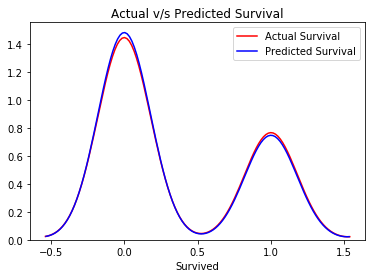

In [352]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_lr,hist=False,color='b',label='Predicted Survival')

In [353]:
accuracy = sum(y_test==Yhat_lr)*100/len(y_test)
accuracy

83.24022346368714

In [354]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_lr  = round(accuracy_score(y_test,Yhat_lr),3)
precision_lr = round(precision_score(y_test,Yhat_lr),3)
recall_lr    = round(recall_score(y_test,Yhat_lr),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_lr*100,precision_lr*100,recall_lr*100))

Accuracy  : 83.2% 
Precision : 76.7% 
Recall    : 74.2% 


## 2. LogisticRegression

In [355]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
Yhat_lgr = lgr.predict(x_test)

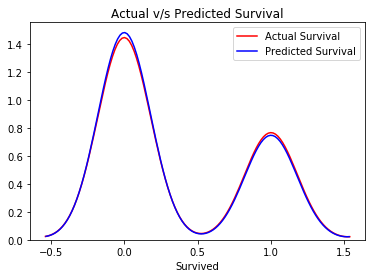

In [356]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_lgr,hist=False,color='b',label='Predicted Survival')

In [357]:
accuracy_lgr = round(accuracy_score(y_test,Yhat_lgr),3)
precision_lgr = round(precision_score(y_test,Yhat_lgr),3)
recall_lgr = round(recall_score(y_test,Yhat_lgr),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_lgr*100,precision_lgr*100,recall_lgr*100))

Accuracy  : 83.2% 
Precision : 76.7% 
Recall    : 74.2% 


## 3. GaussianNB

In [358]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
Yhat_GNB = GNB.predict(x_test)

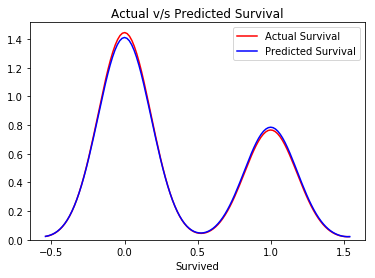

In [359]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_GNB,hist=False,color='b',label='Predicted Survival')

In [360]:
accuracy_GNB  = round(accuracy_score(y_test,Yhat_GNB),3)
precision_GNB = round(precision_score(y_test,Yhat_GNB),2)
recall_GNB    = round(recall_score(y_test,Yhat_GNB),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_GNB*100,precision_GNB*100,recall_GNB*100))

Accuracy  : 81.0% 
Precision : 72.0% 
Recall    : 74.2% 


## 4. SupportVectorMachine-SVC

In [361]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(x_train,y_train)
Yhat_SVC = SVC.predict(x_test)

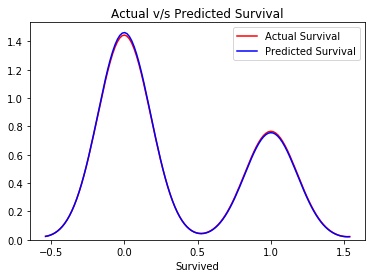

In [362]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_SVC,hist=False,color='b',label='Predicted Survival')

In [363]:
accuracy_SVC = round(accuracy_score(y_test,Yhat_SVC),3)
precision_SVC = round(precision_score(y_test,Yhat_SVC),3)
recall_SVC = round(recall_score(y_test,Yhat_SVC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_SVC*100,precision_SVC*100,recall_SVC*100))

Accuracy  : 73.7% 
Precision : 62.3% 
Recall    : 61.3% 


## 5. SupportVectorMachine-LSVC

In [364]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC(max_iter=10000)
LSVC.fit(x_train,y_train)
Yhat_LSVC = LSVC.predict(x_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


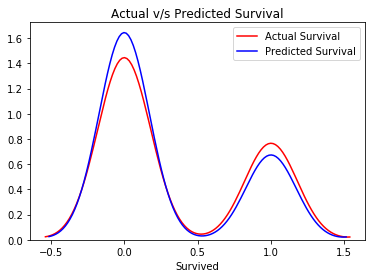

In [365]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_LSVC,hist=False,color='b',label='Predicted Survival')

In [366]:
accuracy_LSVC = round(accuracy_score(y_test,Yhat_LSVC),3)
precision_LSVC = round(precision_score(y_test,Yhat_LSVC),3)
recall_LSVC = round(recall_score(y_test,Yhat_LSVC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_LSVC*100,precision_LSVC*100,recall_LSVC*100))

Accuracy  : 79.9% 
Precision : 75.0% 
Recall    : 62.9% 


## 6. StochasticGradientDescent-SGDClassifier

In [367]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(x_train,y_train)
Yhat_SGDC = SGDC.predict(x_test)

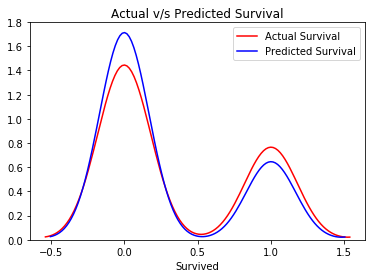

In [368]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_SGDC,hist=False,color='b',label='Predicted Survival')

In [369]:
accuracy_SGDC = round(accuracy_score(y_test,Yhat_SGDC),3)
precision_SGDC = round(precision_score(y_test,Yhat_SGDC),3)
recall_SGDC = round(recall_score(y_test,Yhat_SGDC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_SGDC*100,precision_SGDC*100,recall_SGDC*100))

Accuracy  : 77.10000000000001% 
Precision : 71.39999999999999% 
Recall    : 56.49999999999999% 


## 7. Perceptron

In [370]:
from sklearn.linear_model import Perceptron
pn = Perceptron()
pn.fit(x_train,y_train)
Yhat_pn = pn.predict(x_test)

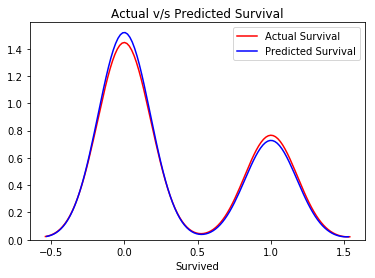

In [371]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_pn,hist=False,color='b',label='Predicted Survival')

In [372]:
accuracy_pn  = round(accuracy_score(y_test,Yhat_pn),3)
precision_pn = round(precision_score(y_test,Yhat_pn),3)
recall_pn    = round(recall_score(y_test,Yhat_pn),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_pn*100,precision_pn*100,recall_pn*100))

Accuracy  : 77.7% 
Precision : 69.0% 
Recall    : 64.5% 


## 8. RandomForestClassifier

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
cross_val_score(rf,x_train,y_train,cv=5)

array([0.8041958 , 0.8041958 , 0.74647887, 0.81690141, 0.76760563])

To find the optimal hyperparameter,we'll use grid search

In [374]:
from sklearn.model_selection import GridSearchCV

In [375]:
def print_result(results):
    print('BEST PARAMS {}'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,2),round(std*2,2),params))

In [376]:
parameter={'n_estimators':[5,50,100],
           'max_depth':[2,10,20,None]}                  # How many random forest do you want to build(n_estimators)
cv = GridSearchCV(rf,parameter,cv=5)                    # 3(n_estimators)*4(max_depth)*5(cv) = 60 models
cv.fit(x_train,y_train.values.ravel())
print_result(cv)

BEST PARAMS {'max_depth': 10, 'n_estimators': 50}
0.8 (+/-0.03) for {'max_depth': 2, 'n_estimators': 5}
0.79 (+/-0.05) for {'max_depth': 2, 'n_estimators': 50}
0.79 (+/-0.03) for {'max_depth': 2, 'n_estimators': 100}
0.82 (+/-0.08) for {'max_depth': 10, 'n_estimators': 5}
0.83 (+/-0.06) for {'max_depth': 10, 'n_estimators': 50}
0.82 (+/-0.06) for {'max_depth': 10, 'n_estimators': 100}
0.8 (+/-0.05) for {'max_depth': 20, 'n_estimators': 5}
0.82 (+/-0.06) for {'max_depth': 20, 'n_estimators': 50}
0.81 (+/-0.04) for {'max_depth': 20, 'n_estimators': 100}
0.79 (+/-0.06) for {'max_depth': None, 'n_estimators': 5}
0.81 (+/-0.06) for {'max_depth': None, 'n_estimators': 50}
0.8 (+/-0.05) for {'max_depth': None, 'n_estimators': 100}


In [377]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=10)
rf1.fit(x_train,y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=50,max_depth=10)
rf2.fit(x_train,y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=50,max_depth=20)
rf3.fit(x_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [378]:
for model in [rf1,rf2,rf3]:
    Yhat = model.predict(x_test)
    accuracy = round(accuracy_score(y_test,Yhat),3)
    precision = round(precision_score(y_test,Yhat),3)
    recall = round(recall_score(y_test,Yhat),3)
    print("max_depth : {} , n_estimators : {}, A:{} , P:{} , R:{} "
          .format(model.max_depth,model.n_estimators,accuracy,precision,recall))

max_depth : 10 , n_estimators : 100, A:0.86 , P:0.803 , R:0.79 
max_depth : 10 , n_estimators : 50, A:0.849 , P:0.787 , R:0.774 
max_depth : 20 , n_estimators : 50, A:0.855 , P:0.8 , R:0.774 


model rf1 and rf3 has more accuracy

In [379]:
Yhat_rf = rf1.predict(x_test)

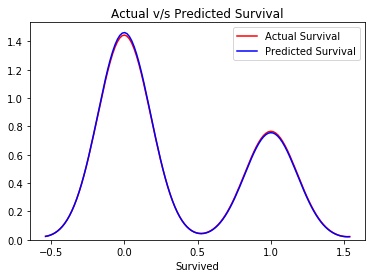

In [380]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_rf,hist=False,color='b',label='Predicted Survival')

In [381]:
accuracy_rf  = round(accuracy_score(y_test,Yhat_rf),3)
precision_rf = round(precision_score(y_test,Yhat_rf),3)
recall_rf    = round(recall_score(y_test,Yhat_rf),3)
print("max_depth : {}  \nn_estimators : {}\nAccuracy  : {}% \nPrecision : {}% \nRecall    : {}% "
      .format(rf1.max_depth,rf1.n_estimators,accuracy_rf*100,precision_rf*100,recall_rf*100))

max_depth : 10  
n_estimators : 100
Accuracy  : 86.0% 
Precision : 80.30000000000001% 
Recall    : 79.0% 


## 9. DecisionTreeClassifier

In [254]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
Yhat_DTC = DTC.predict(x_test)

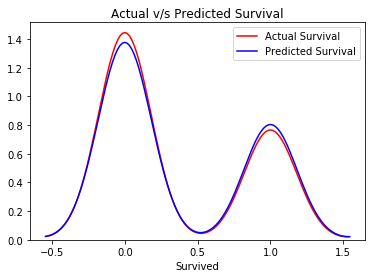

In [255]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_DTC,hist=False,color='b',label='Predicted Survival')

In [256]:
accuracy_DTC  = round(accuracy_score(y_test,Yhat_DTC),3)
precision_DTC = round(precision_score(y_test,Yhat_DTC),3)
recall_DTC    = round(recall_score(y_test,Yhat_DTC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_DTC*100,precision_DTC*100,recall_DTC*100))

Accuracy  : 81.0% 
Precision : 71.2% 
Recall    : 75.8% 


## 10. GradientBoostingClassifier

In [257]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
Yhat_GBC = GBC.predict(x_test)

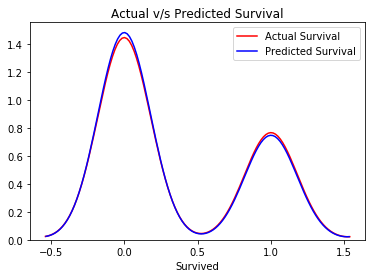

In [258]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_GBC,hist=False,color='b',label='Predicted Survival')

In [259]:
accuracy_GBC  = round(accuracy_score(y_test,Yhat_GBC),3)
precision_GBC = round(precision_score(y_test,Yhat_GBC),3)
recall_GBC    = round(recall_score(y_test,Yhat_GBC),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_GBC*100,precision_GBC*100,recall_GBC*100))

Accuracy  : 84.39999999999999% 
Precision : 78.3% 
Recall    : 75.8% 


## 11. KNN

In [260]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
Yhat_KNN = KNN.predict(x_test)

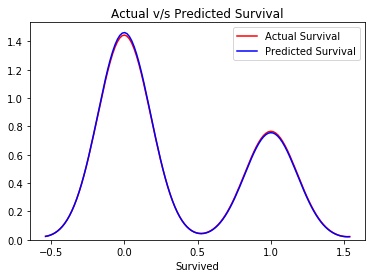

In [261]:
sns.distplot(y_test,hist=False,color='r',label='Actual Survival')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_KNN,hist=False,color='b',label='Predicted Survival')

In [262]:
accuracy_KNN  = round(accuracy_score(y_test,Yhat_KNN),3)
precision_KNN = round(precision_score(y_test,Yhat_KNN),3)
recall_KNN    = round(recall_score(y_test,Yhat_KNN),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_KNN*100,precision_KNN*100,recall_KNN*100))

Accuracy  : 72.6% 
Precision : 60.699999999999996% 
Recall    : 59.699999999999996% 


# **-----------------------------------------------------------------------------------------------------------**

In [263]:
prediction = pd.DataFrame({'Models':['LinearRegression','LogisticRegression','GaussianNB','SupportVectorMachine-SVC','SupportVectorMachine-LSVC',
           'StochasticGradientDescent-SGDClassifier','Perceptron','RandomForestClassifier','DecisionTreeClassifier',
           'GradientBoostingClassifier','KNN'],
 
 'Accuracy_Score':[accuracy_lr,accuracy_lgr,accuracy_GNB,accuracy_SVC,accuracy_LSVC,accuracy_SGDC,accuracy_pn,accuracy_rf,
                   accuracy_DTC,accuracy_GBC,accuracy_KNN],
 
 
 'Precision_Score':[precision_lr,precision_lgr,precision_GNB,precision_SVC,precision_LSVC,precision_SGDC,precision_pn,
                    precision_rf,precision_DTC,precision_GBC,precision_KNN],
 
 
 'Recall_Score':[recall_lr,recall_lgr,recall_GNB,recall_SVC,recall_LSVC,recall_SGDC,recall_pn,recall_rf,recall_DTC,recall_GBC,
                 recall_KNN]})
prediction.sort_values(by='Accuracy_Score', ascending=False)

,Models,Accuracy_Score,Precision_Score,Recall_Score
7,RandomForestClassifier,0.877,0.833,0.806
9,GradientBoostingClassifier,0.844,0.783,0.758
4,SupportVectorMachine-LSVC,0.838,0.762,0.774
0,LinearRegression,0.832,0.767,0.742
1,LogisticRegression,0.832,0.767,0.742
2,GaussianNB,0.810,0.720,0.742
8,DecisionTreeClassifier,0.810,0.712,0.758
3,SupportVectorMachine-SVC,0.737,0.623,0.613
10,KNN,0.726,0.607,0.597
5,StochasticGradientDescent-SGDClassifier,0.363,0.341,0.903


# **-----------------------------------------------------------------------------------------------------------**

## Submission 

In [267]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [383]:

Prediction = rf1.predict(titanic_test)
df1 = pd.DataFrame({ 'PassengerId' : P_ID, 'Survived': Prediction})
df1.to_csv('submission.csv', index=False)